In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import sklearn.metrics
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KM, AgglomerativeClustering as AgC, SpectralClustering as SpC, DBSCAN as DBS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
%matplotlib inline


#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
data = pd.read_csv("Data-Prepped.csv",index_col=0)
data.head()

Bronze  Silver  Gold  Platinum  Diamond  Master  GrandMaster  LeagueIndex  \
0     0.0     0.0   0.0       0.0      1.0     0.0          0.0          5.0   
1     0.0     0.0   0.0       0.0      1.0     0.0          0.0          5.0   
2     0.0     0.0   0.0       1.0      0.0     0.0          0.0          4.0   
3     0.0     0.0   1.0       0.0      0.0     0.0          0.0          3.0   
4     0.0     0.0   1.0       0.0      0.0     0.0          0.0          3.0   

    Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  AssignToHotkeys  \
0  27.0          10.0      3000.0  143.7180         0.003515         0.000220   
1  23.0          10.0      5000.0  129.2322         0.003304         0.000259   
2  30.0          10.0       200.0   69.9612         0.001101         0.000336   
3  19.0          20.0       400.0  107.6016         0.001034         0.000213   
4  32.0          10.0       500.0  122.8908         0.001136         0.000327   

   UniqueHotkeys  MinimapAttacks  MinimapRightClicks  NumberOfPACs  \
0            7.0        0.000110            0.000392      0.004849   
1            4.0        0.000294            0.000432      0.004307   
2            4.0        0.000294            0.000461      0.002926   
3            1.0        0.000053            0.000543      0.003783   
4            2.0        0.000000            0.001329      0.002368   

   GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
0         32.6677        40.8673        4.7508              28.0     0.001397   
1         32.9194        42.3454        4.8434              22.0     0.001193   
2         44.6475        75.3548        4.0430              22.0     0.000745   
3         29.2203        53.7352        4.9155              19.0     0.000426   
4         22.6885        62.0813        9.3740              15.0     0.001174   

   UniqueUnitsMade  ComplexUnitsMade  ComplexAbilitiesUsed  
0              6.0               0.0              0.000000  
1              5.0               0.0              0.000208  
2              6.0               0.0              0.000189  
3              7.0               0.0              0.000384  
4              4.0               0.0              0.000019

In [3]:
interesting_vars = ['LeagueIndex','HoursPerWeek','APM','SelectByHotkeys','UniqueHotkeys','MinimapAttacks',
                         'NumberOfPACs','ActionLatency','TotalMapExplored','WorkersMade','ComplexUnitsMade']
print(interesting_vars)
print(len(interesting_vars))
var = []
for i in data:
    var.append(i)
print(var)

interesting_variables = []
for i, v in enumerate(var):
    print(i, v)
    if(v in interesting_vars):
        interesting_variables.append(i)
print(interesting_variables)

['LeagueIndex', 'HoursPerWeek', 'APM', 'SelectByHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'ActionLatency', 'TotalMapExplored', 'WorkersMade', 'ComplexUnitsMade']
11
['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']
0 Bronze
1 Silver
2 Gold
3 Platinum
4 Diamond
5 Master
6 GrandMaster
7 LeagueIndex
8 Age
9 HoursPerWeek
10 TotalHours
11 APM
12 SelectByHotkeys
13 AssignToHotkeys
14 UniqueHotkeys
15 MinimapAttacks
16 MinimapRightClicks
17 NumberOfPACs
18 GapBetweenPACs
19 ActionLatency
20 ActionsInPAC
21 TotalMapExplored
22 WorkersMade
23 UniqueUnitsMade
24 ComplexUnitsMade
25 ComplexAbilitiesUsed
[7, 9, 11, 12, 14, 15, 17, 19, 21, 

In [4]:
#transform input data (normalize scaling)
ssc = SSc()
data = pd.DataFrame(ssc.fit_transform(data))
n_samples, n_features = data.shape
print("n_samples  {} \nn_features {}".format(n_samples, n_features))

n_samples  3338 
n_features 26


##### Within cluster sum of squares (WCSS) for determining number of clusters to use (elbow method)

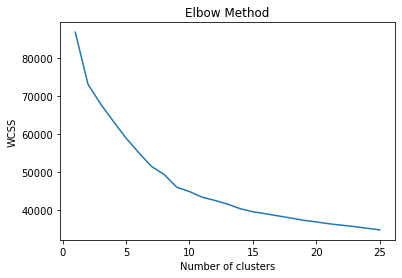

In [5]:
wcss = []
for i in range(1, 26):
    kmeans = KM(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 26), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### It's pretty smooth throughout, so it will be difficult to find groupings here.

	Using K-means clustering
	The white Xs are the centroids of each cluster


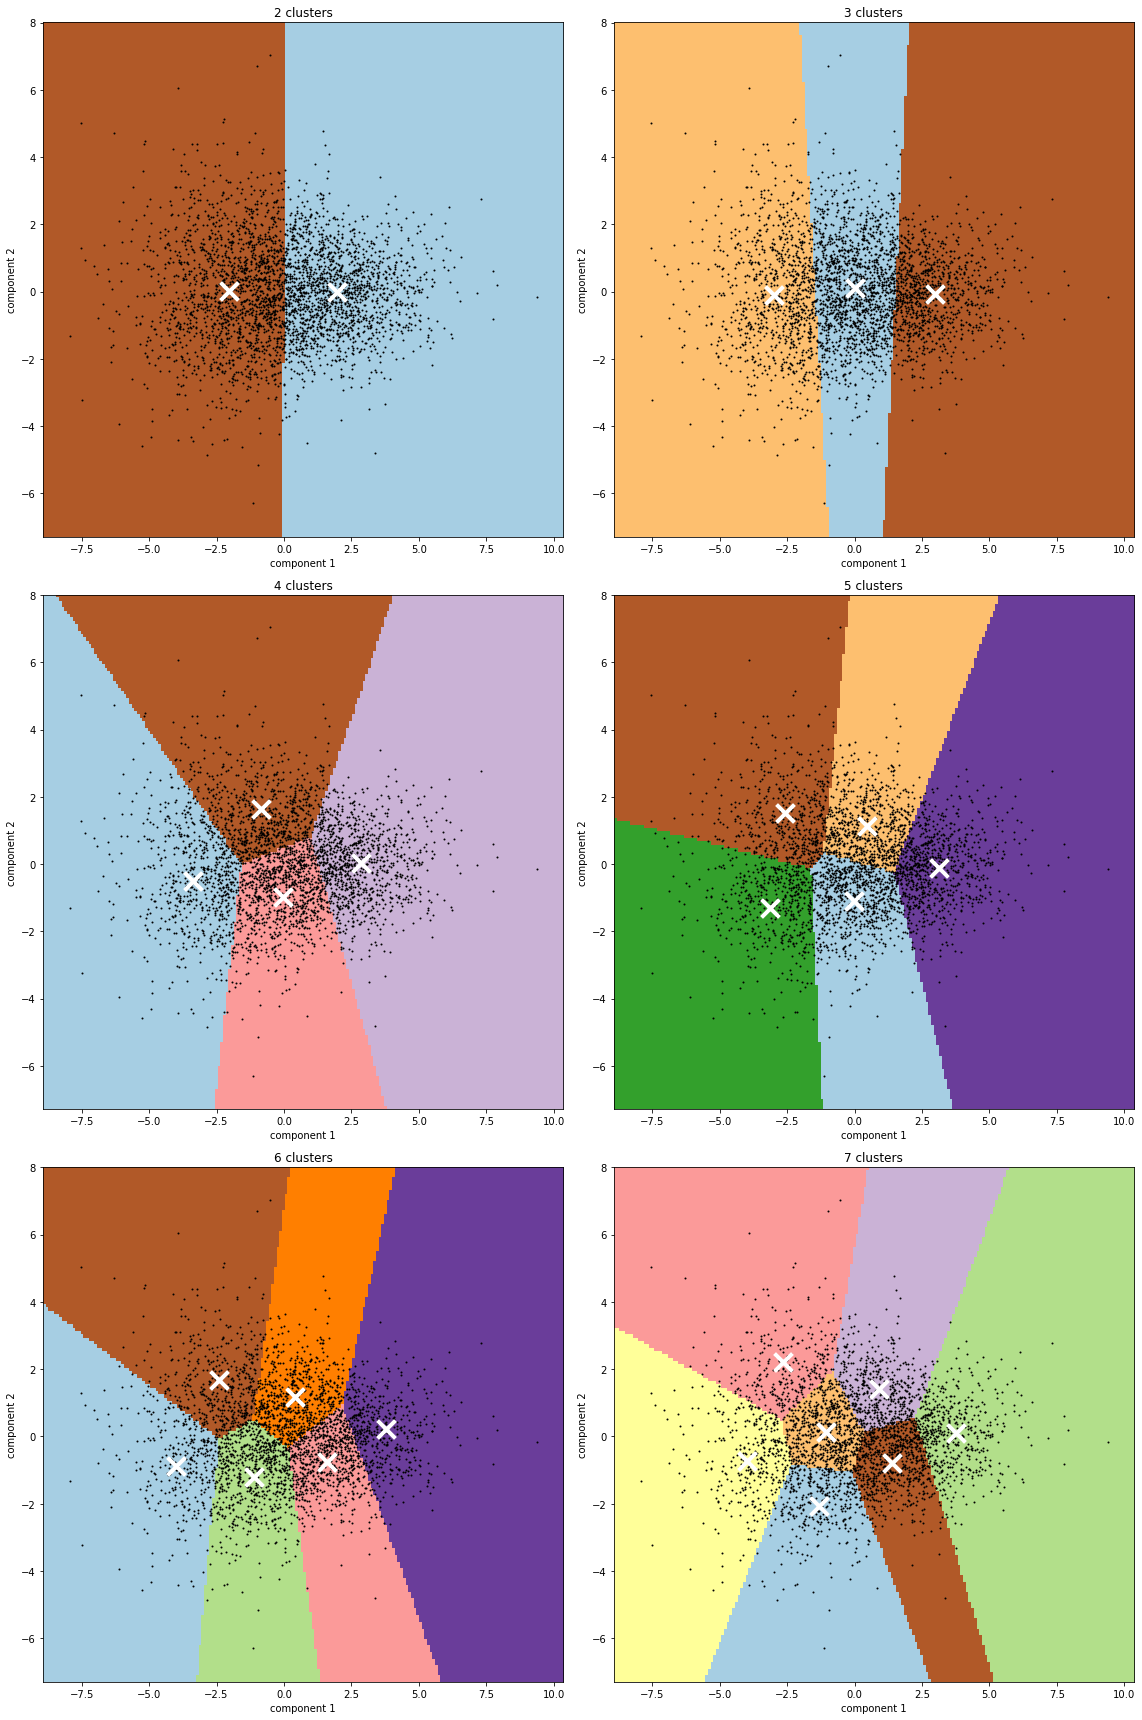

In [6]:
def kmcluster(X, nclusters):
    km = KM(n_clusters=nclusters, random_state=2020).fit(X)
    return km

print("\tUsing K-means clustering\n\tThe white Xs are the centroids of each cluster")

reduced_data = PCA(n_components=2).fit_transform(data)

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
def addSubplot(subplt_n, reduced_data, n_clstrs):
    meshstep = 0.1
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, meshstep), np.arange(y_min, y_max, meshstep))
    kmeans = KM(init='k-means++', n_clusters=n_clstrs, n_init=10)
    kmeans.fit(reduced_data)
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[subplt_n].imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')
    axes[subplt_n].plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2)
    for cluster in range(0, kmeans.cluster_centers_.shape[0]):
        axes[subplt_n].scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1],
                    marker='x', s=320, linewidths=4,
                    label='Cluster ' + str(cluster),
                    color='w', zorder=4)#, hold=True)
        axes[subplt_n].set_title('{} clusters'.format(n_clstrs))
        axes

for i in range(2,8):
    addSubplot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

##### As expected, the data lies in one large cluster so it's hard to find meaningful divisions in the data

	Another graphing method using KMeans clustering



<Figure size 432x288 with 0 Axes>

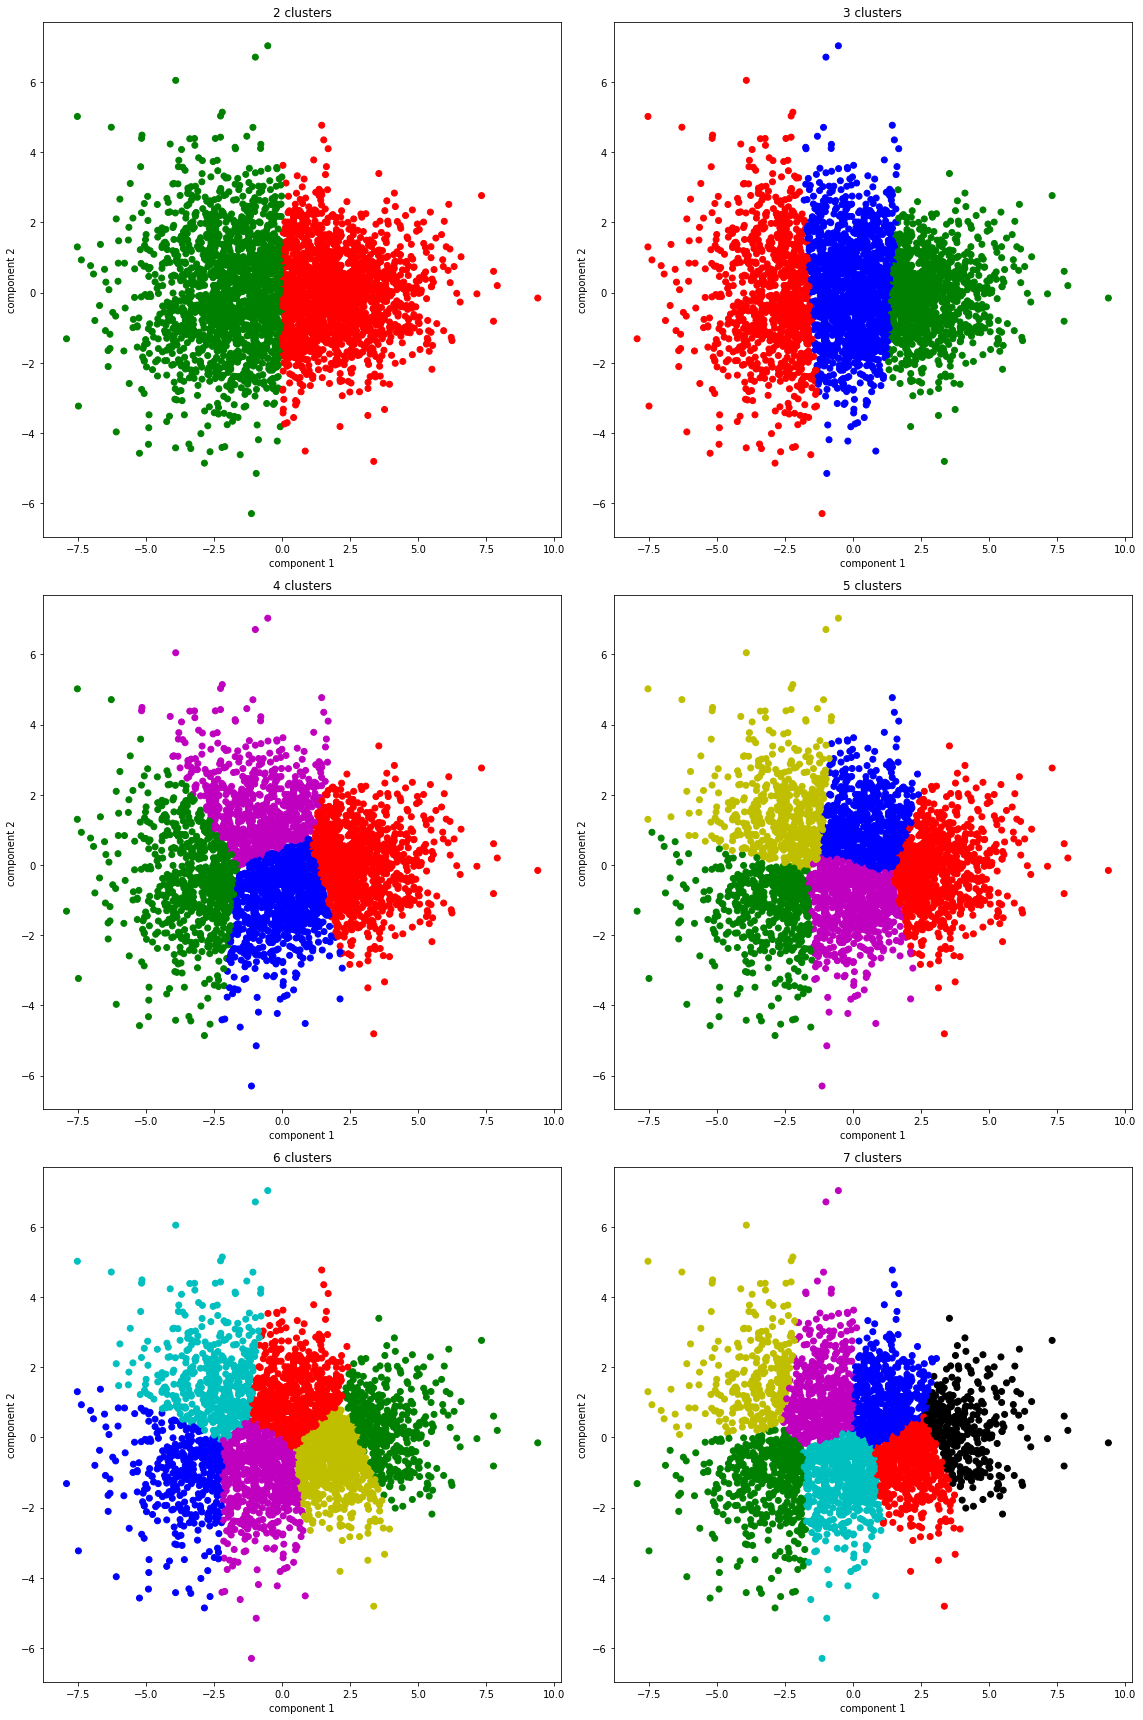

In [7]:
print("\tAnother graphing method using KMeans clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clustrs):
    axes[subplt_n].set_title('{} clusters'.format(n_clustrs)) 

    km = KM(n_clusters=n_clustrs, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(reduced_data)
    color_no = np.array(km.labels_)
    colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using Agglomerative clustering



<Figure size 432x288 with 0 Axes>

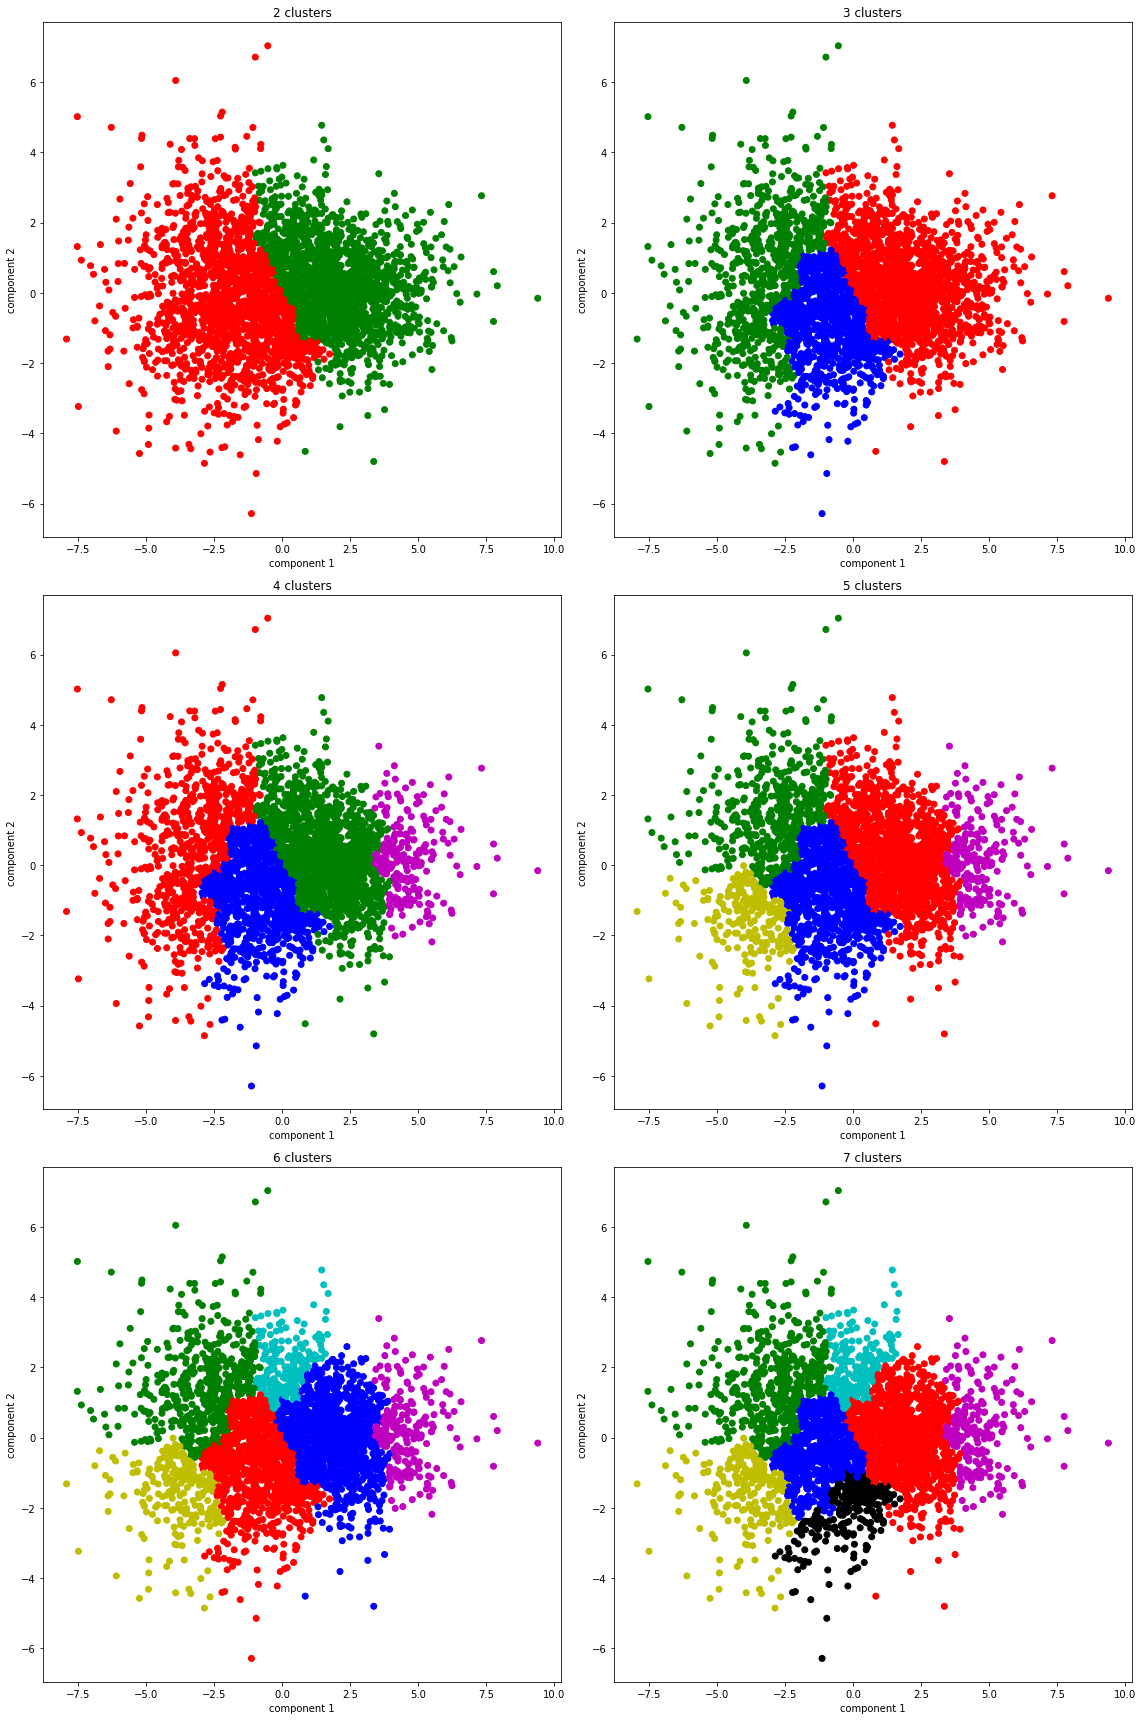

In [8]:
print("\tUsing Agglomerative clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(n_clstrs))) 

    agc = AgC(n_clusters=n_clstrs)
    agc.fit(reduced_data)

    color_no = np.array(agc.labels_)
    colors_dict = ['r','g','b','m','y','c','k']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using Spectral clustering



<Figure size 432x288 with 0 Axes>

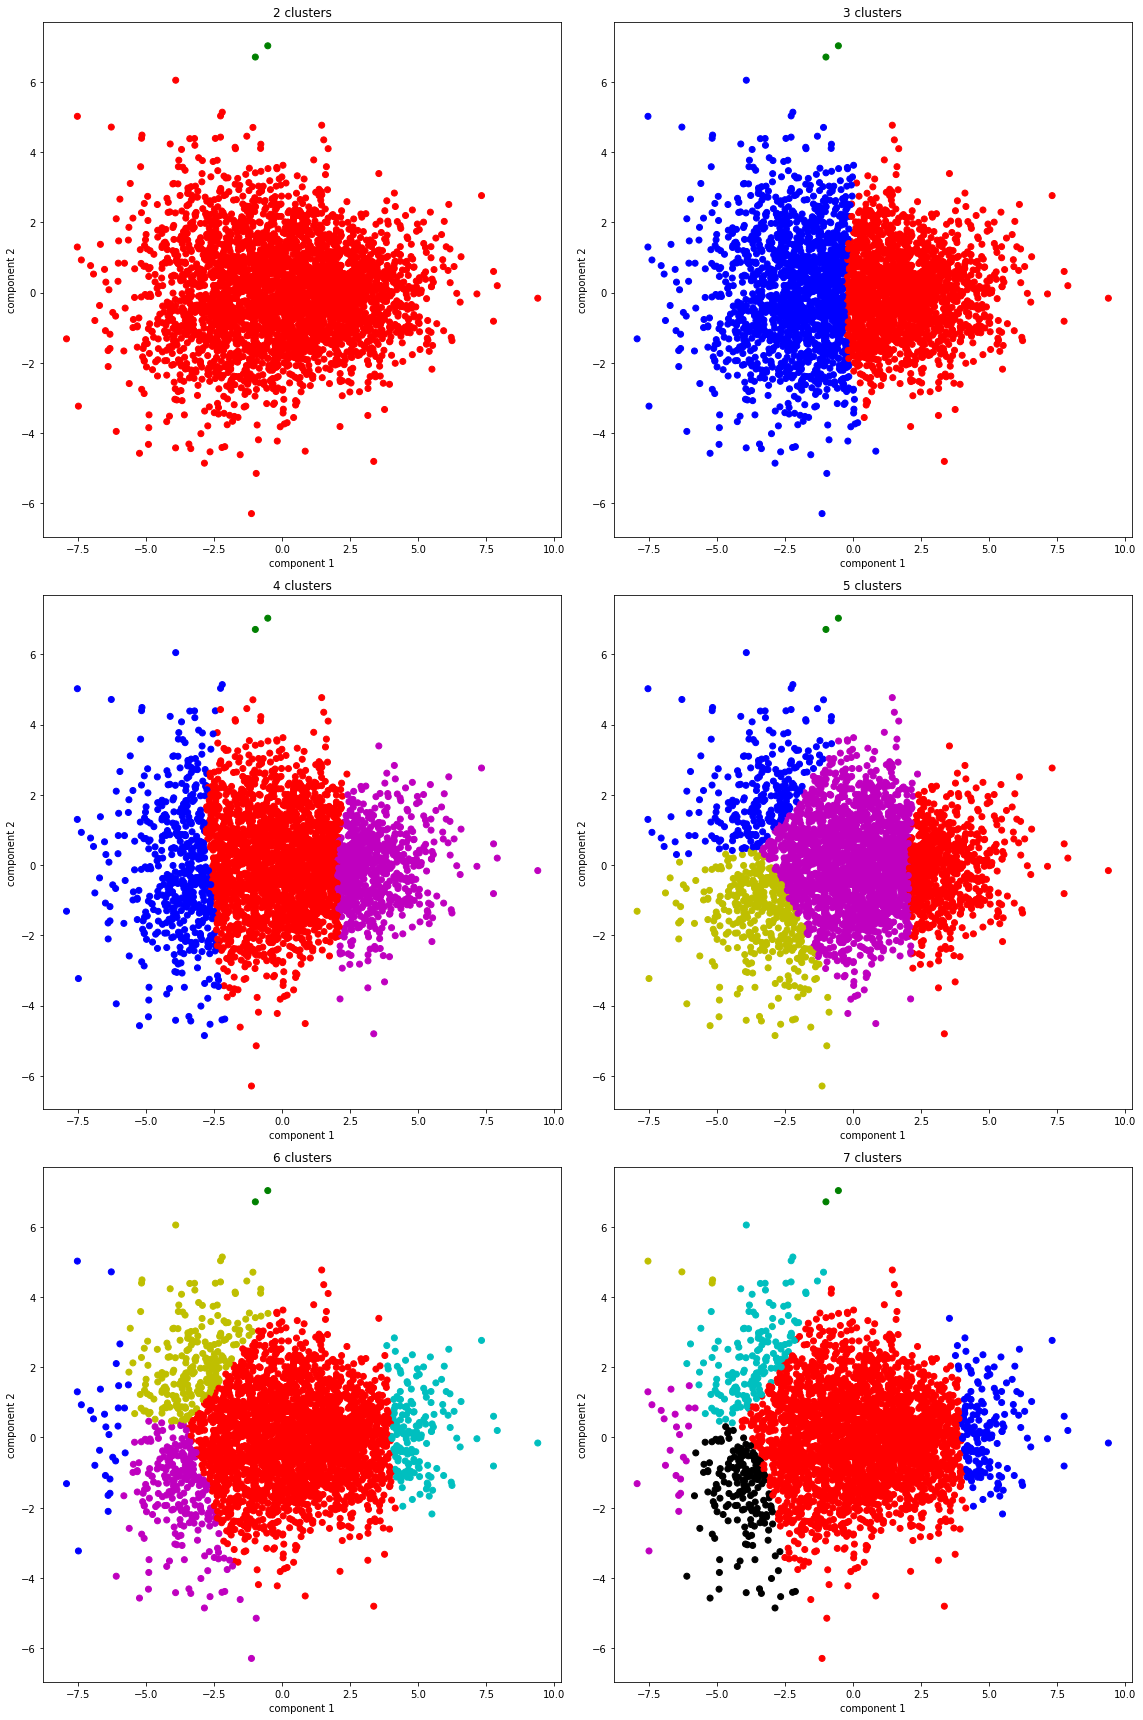

In [9]:
print("\tUsing Spectral clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(n_clstrs))) 

    spc = SpC(n_clusters=n_clstrs)
    spc.fit(reduced_data)

    color_no = np.array(spc.labels_)
    colors_dict = ['r','g','b','m','y','c','k']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using DBSCAN clustering



<Figure size 432x288 with 0 Axes>

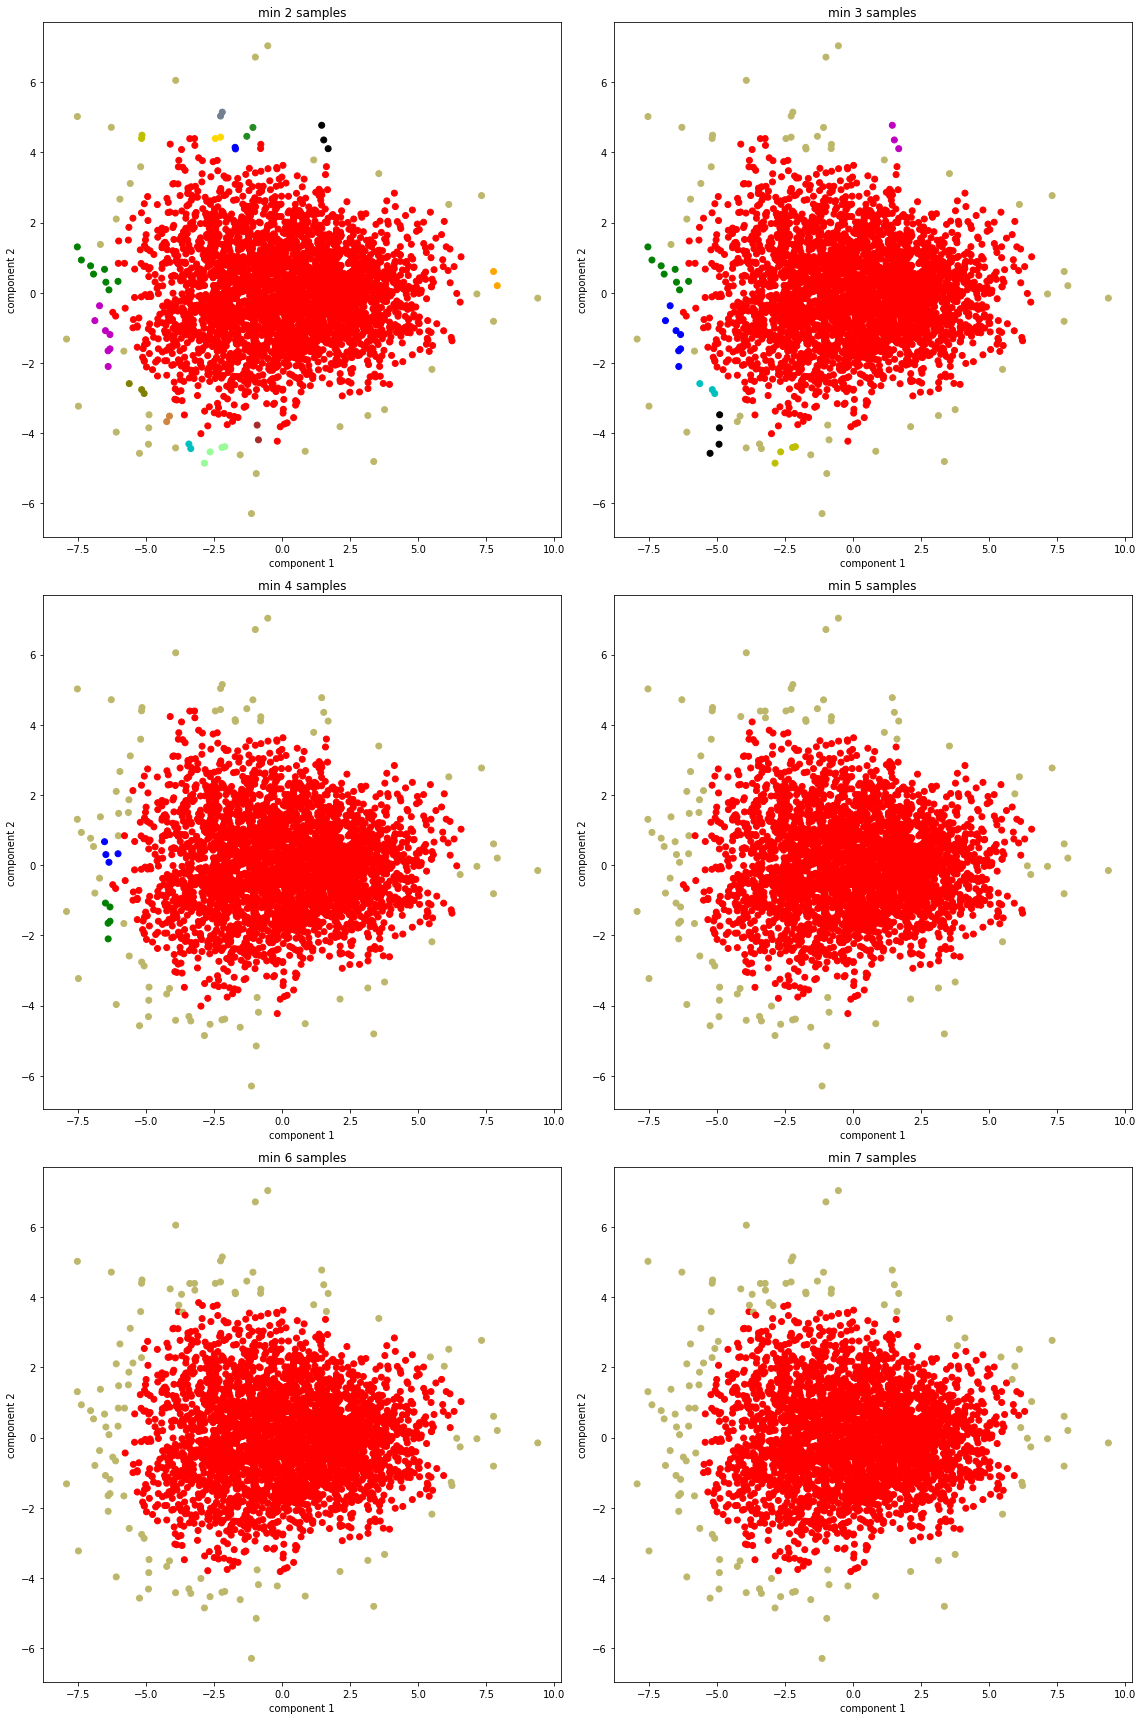

In [10]:
print("\tUsing DBSCAN clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(str(min_smpls))) 

    dbs = DBS(min_samples=min_smpls)
    dbs.fit(reduced_data)
    color_no = np.array(dbs.labels_)
    colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using DBSCAN clustering on the data



<Figure size 432x288 with 0 Axes>

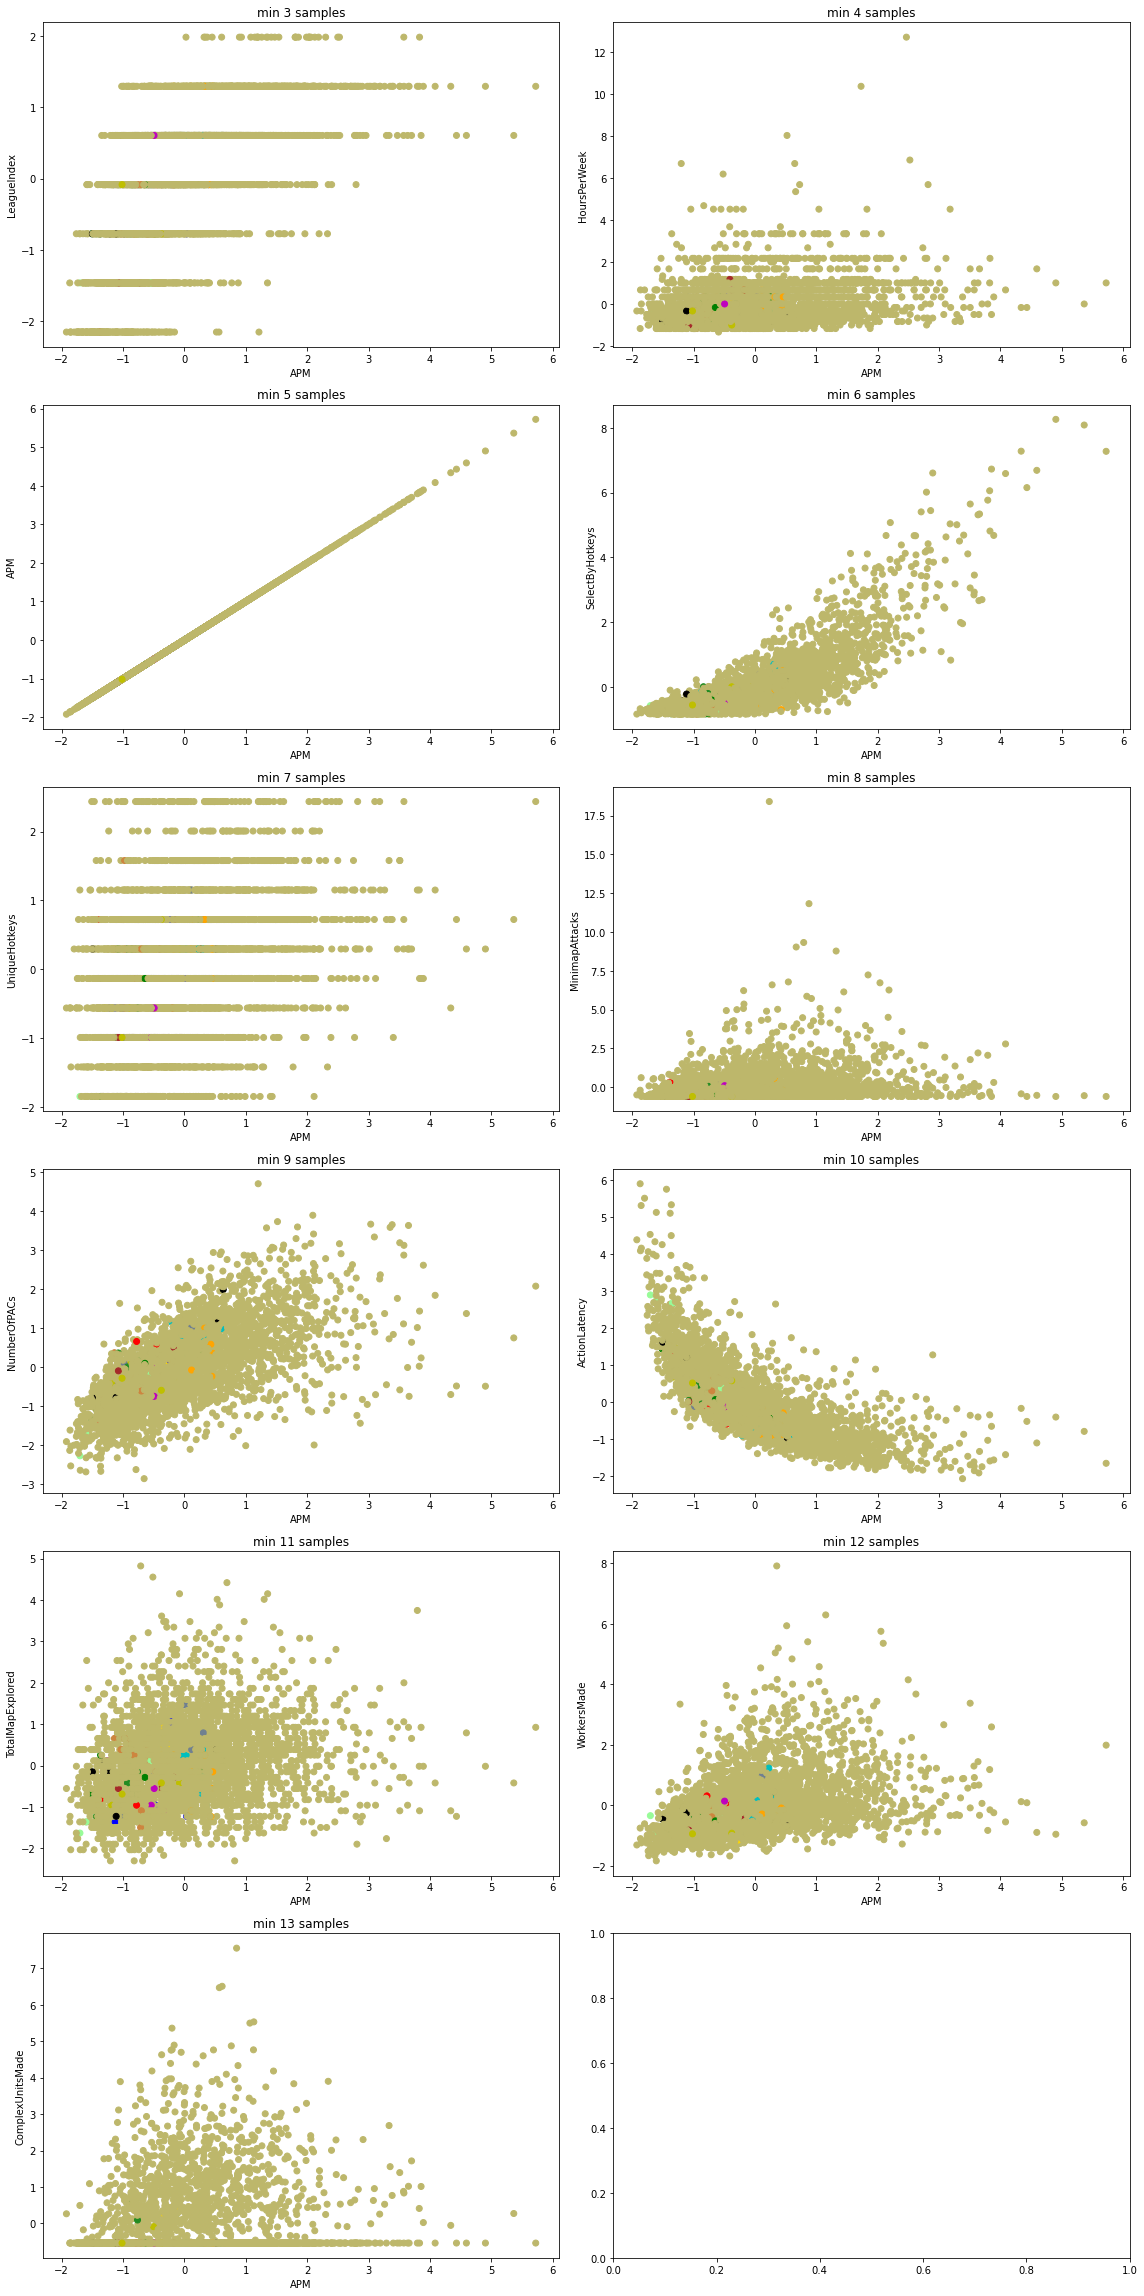

In [18]:
print("\tUsing DBSCAN clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=11

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = DBS(eps =1.5, min_samples=3)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(min_smpls)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


##### Nothing interesting out of DBSCAN

## KMeans Clustering

	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

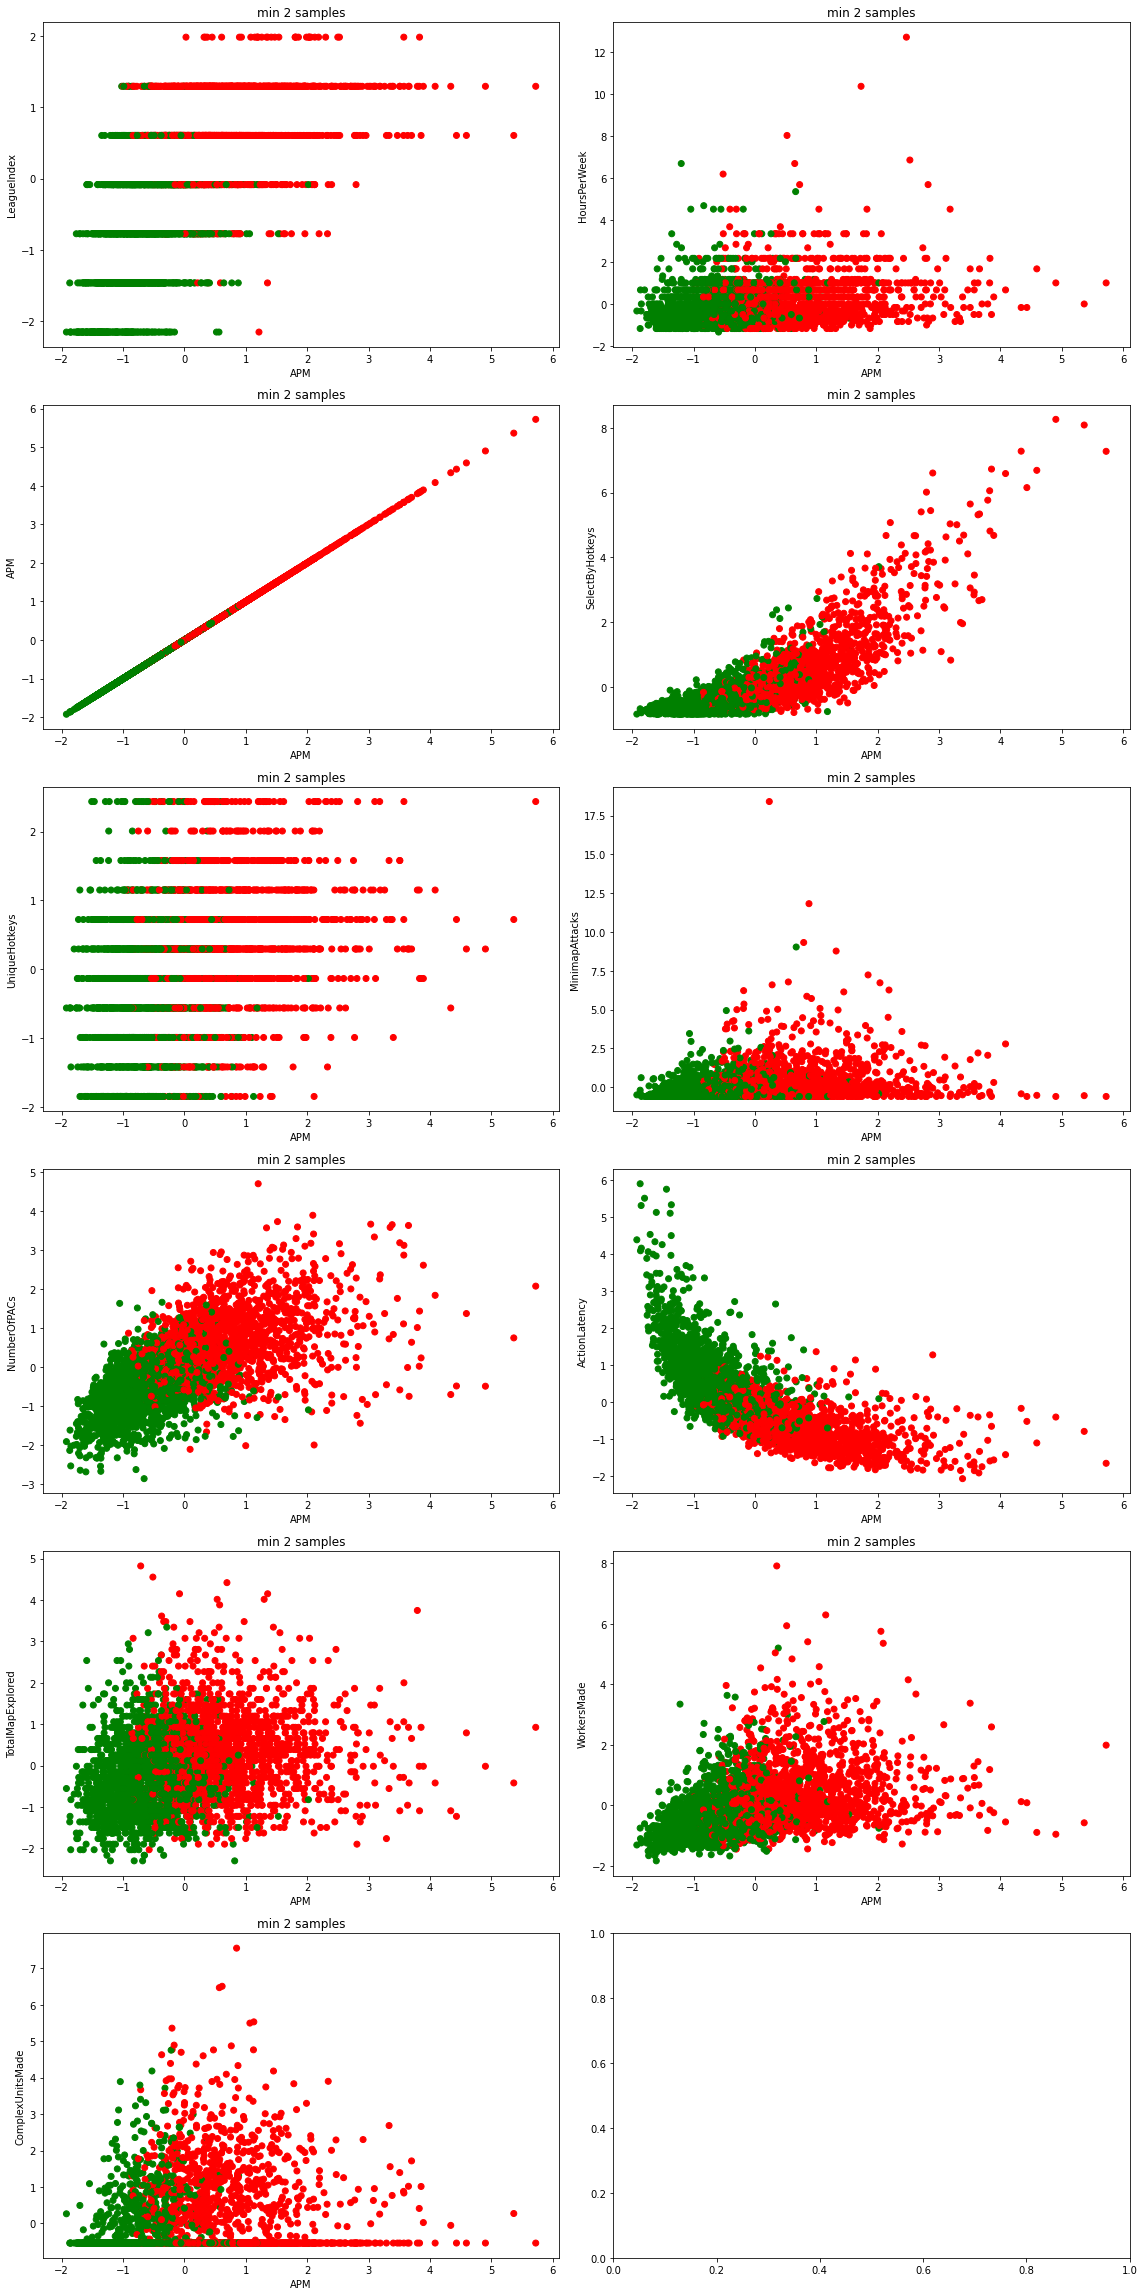

In [19]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=11

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = KM(init='k-means++', n_clusters=2, n_init=10)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(2)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

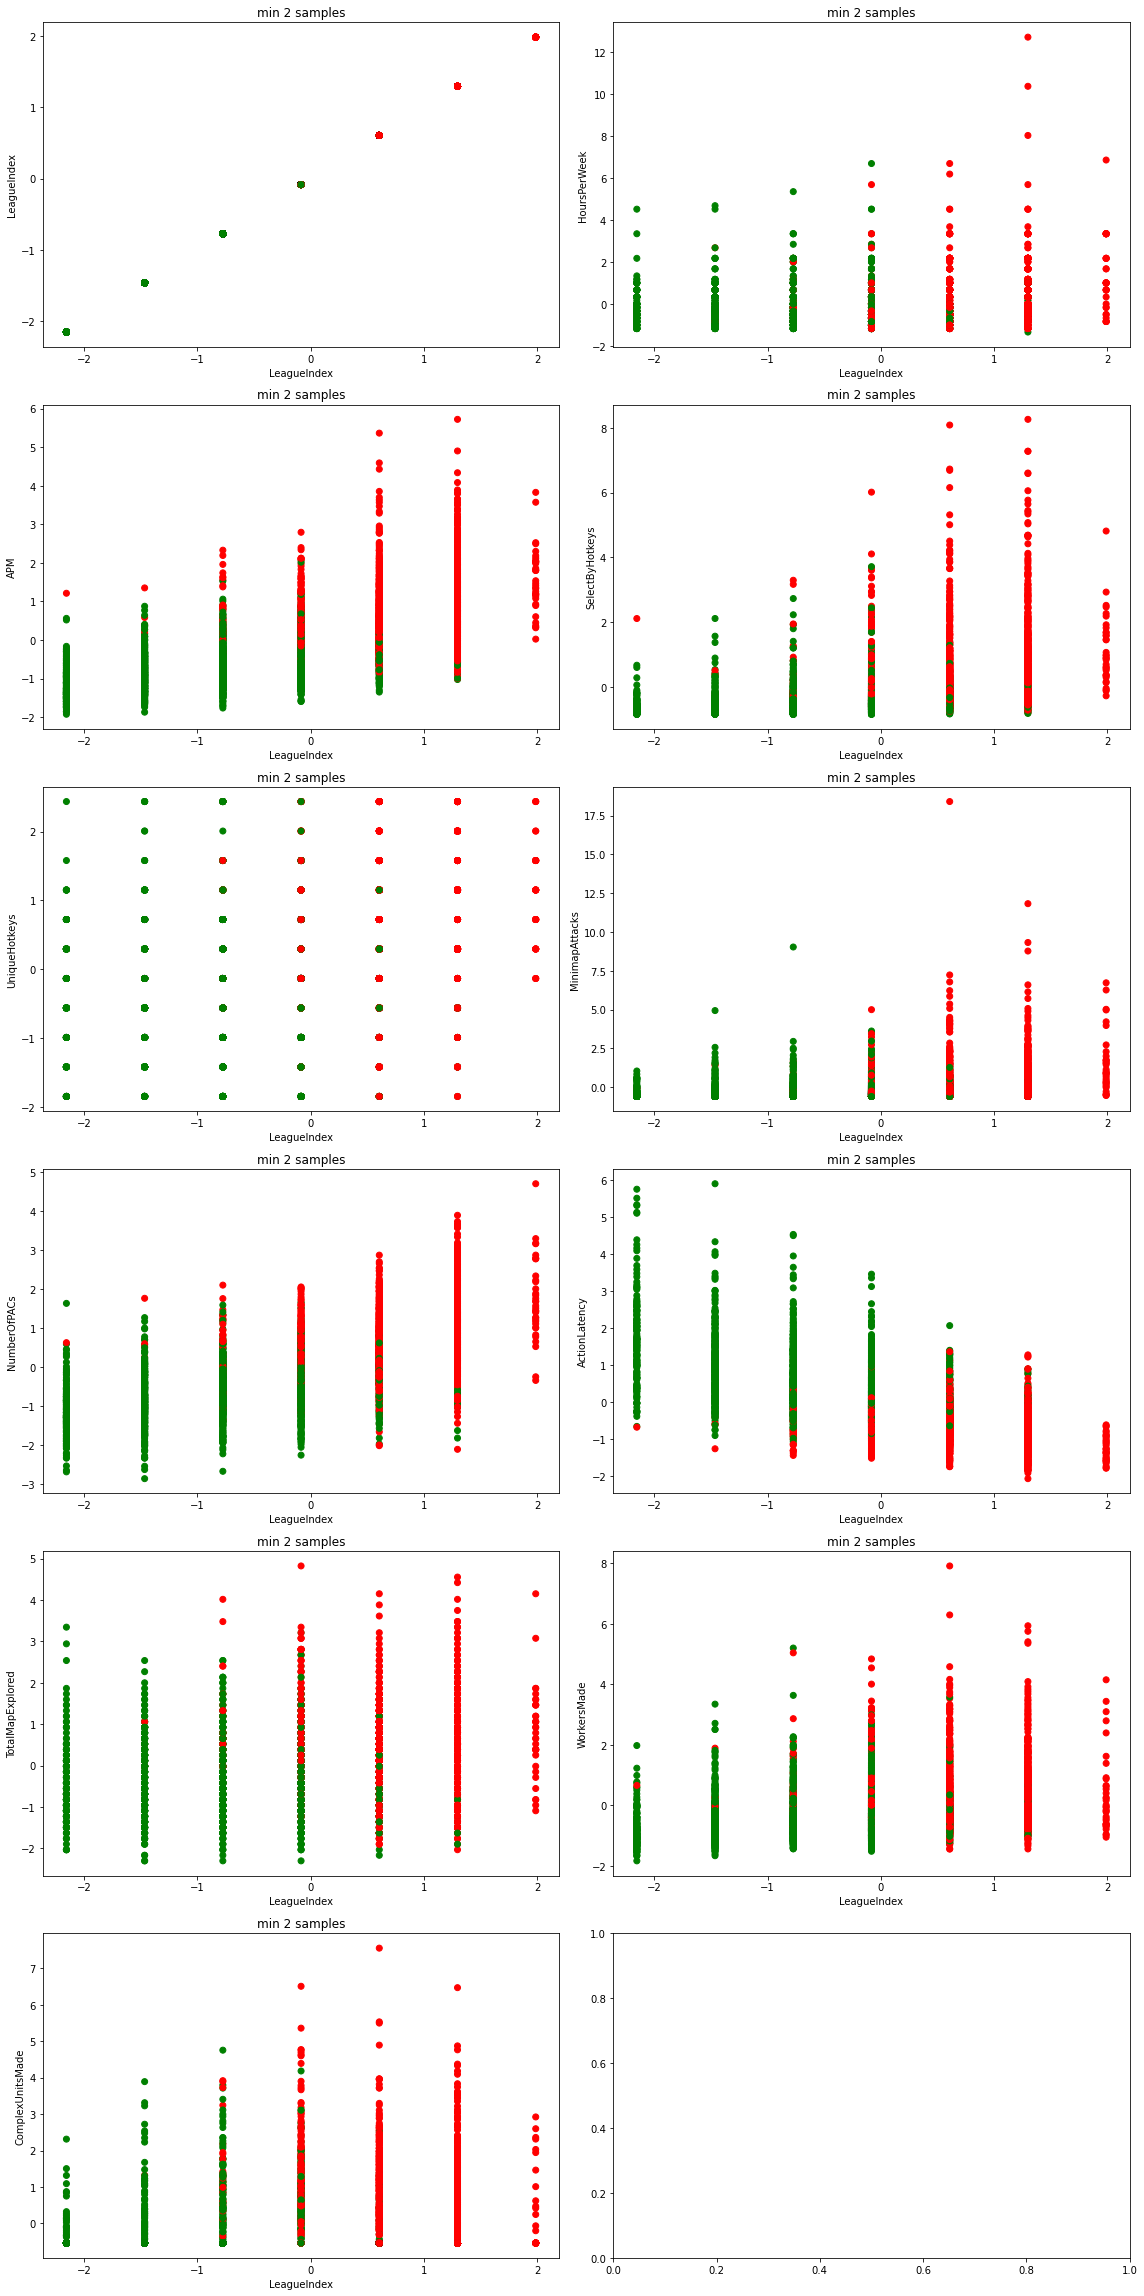

In [22]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=7

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = KM(init='k-means++', n_clusters=2, n_init=10)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(2)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


##### KMeans clustering with 2 groups seems to be separating players by skill level

	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

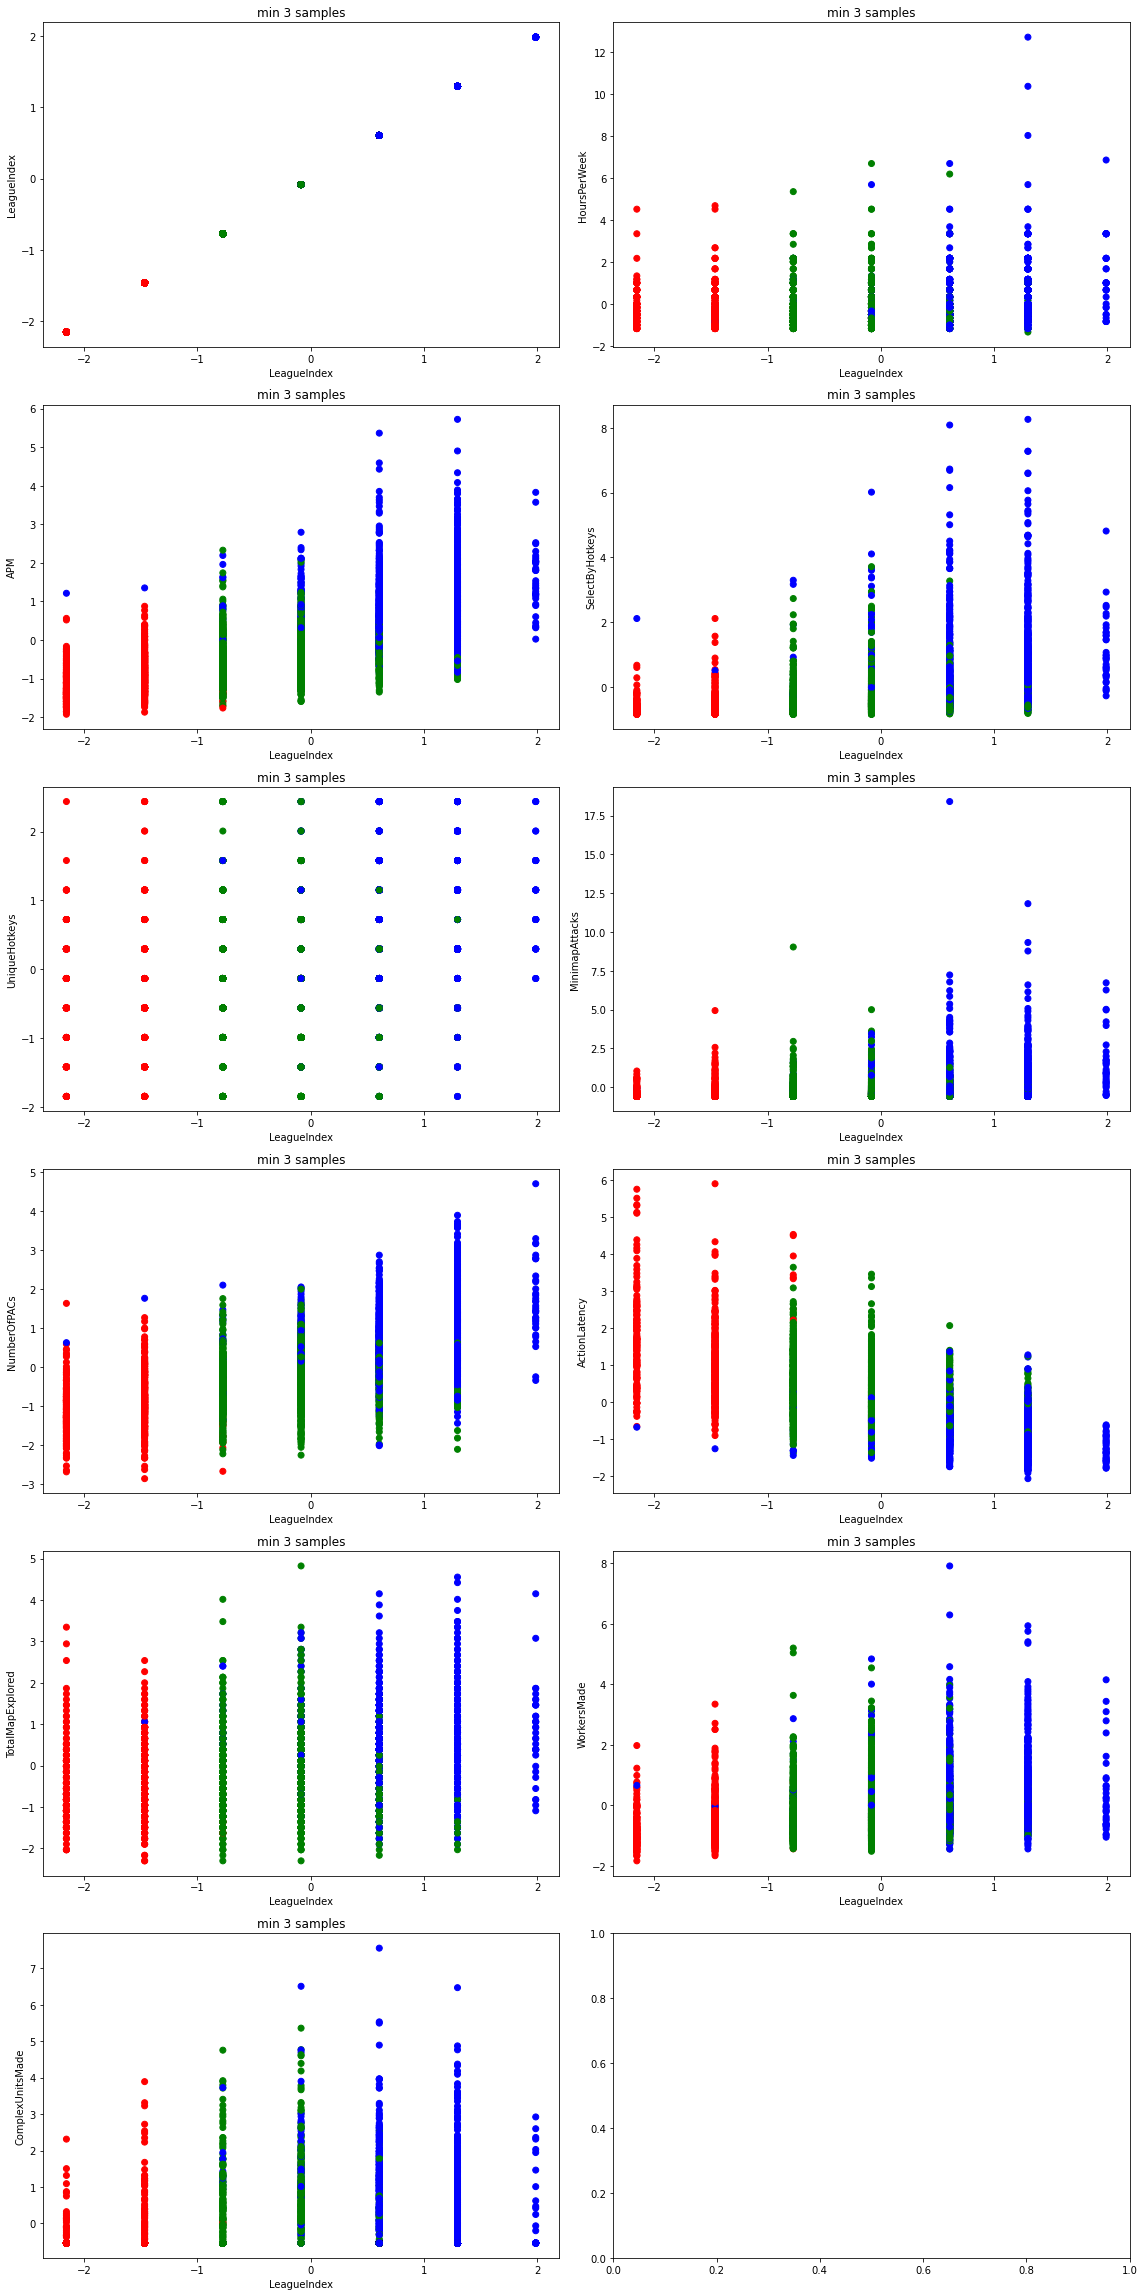

In [24]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=7

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = KM(init='k-means++', n_clusters=3, n_init=10)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(3)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


##### The same as before, it seems to be separating players by skill level

	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

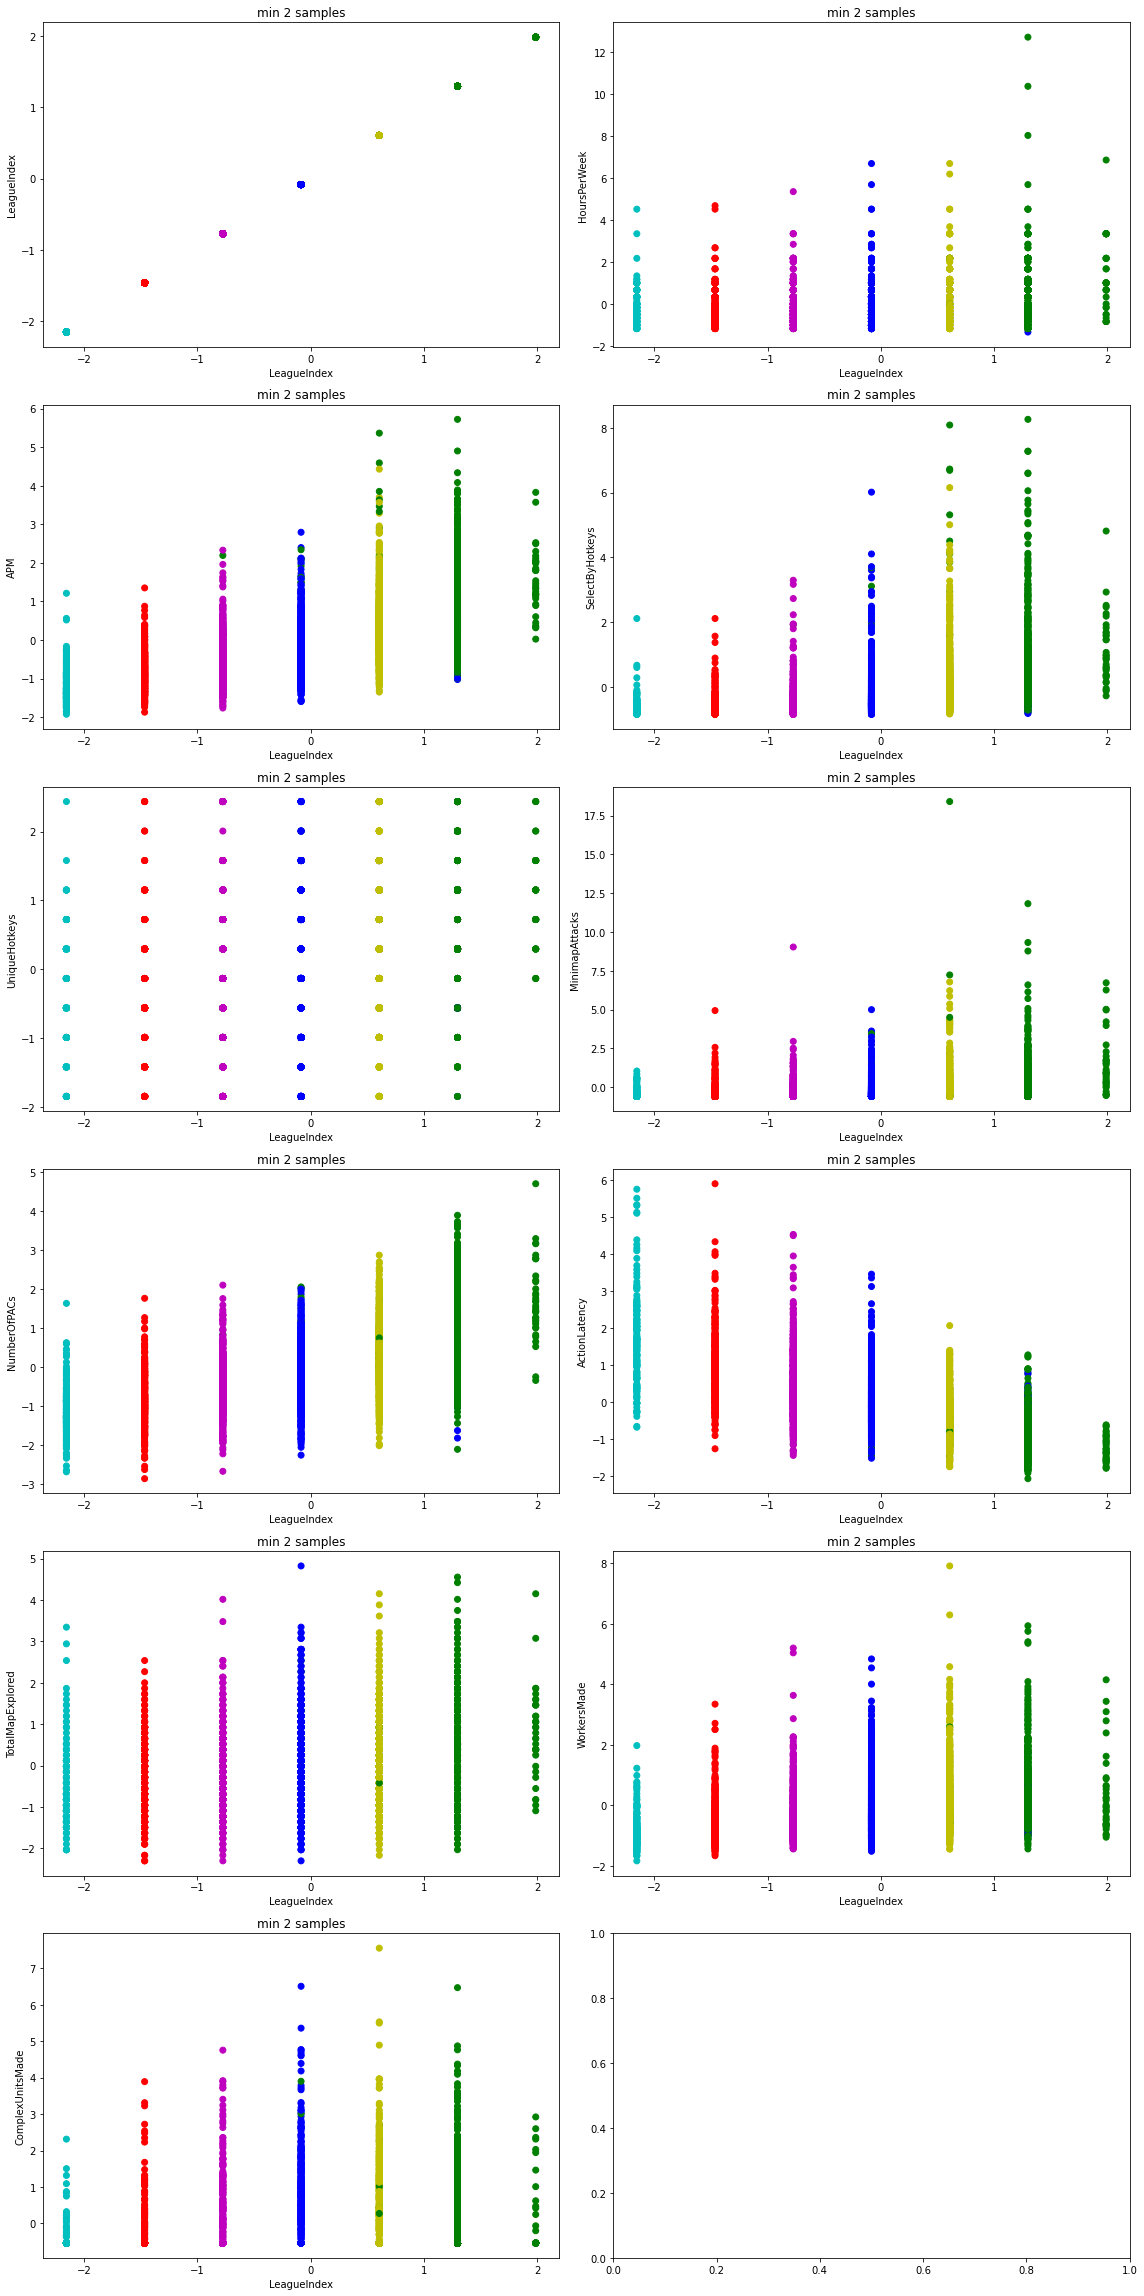

In [27]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=7

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
    
clusters = 6
dbs = KM(init='k-means++', n_clusters=clusters, n_init=10)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(clusters) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


##### KMeans seems to want to split the players based on skill level. Now lets see if it does the same if a player's league is excluded

	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

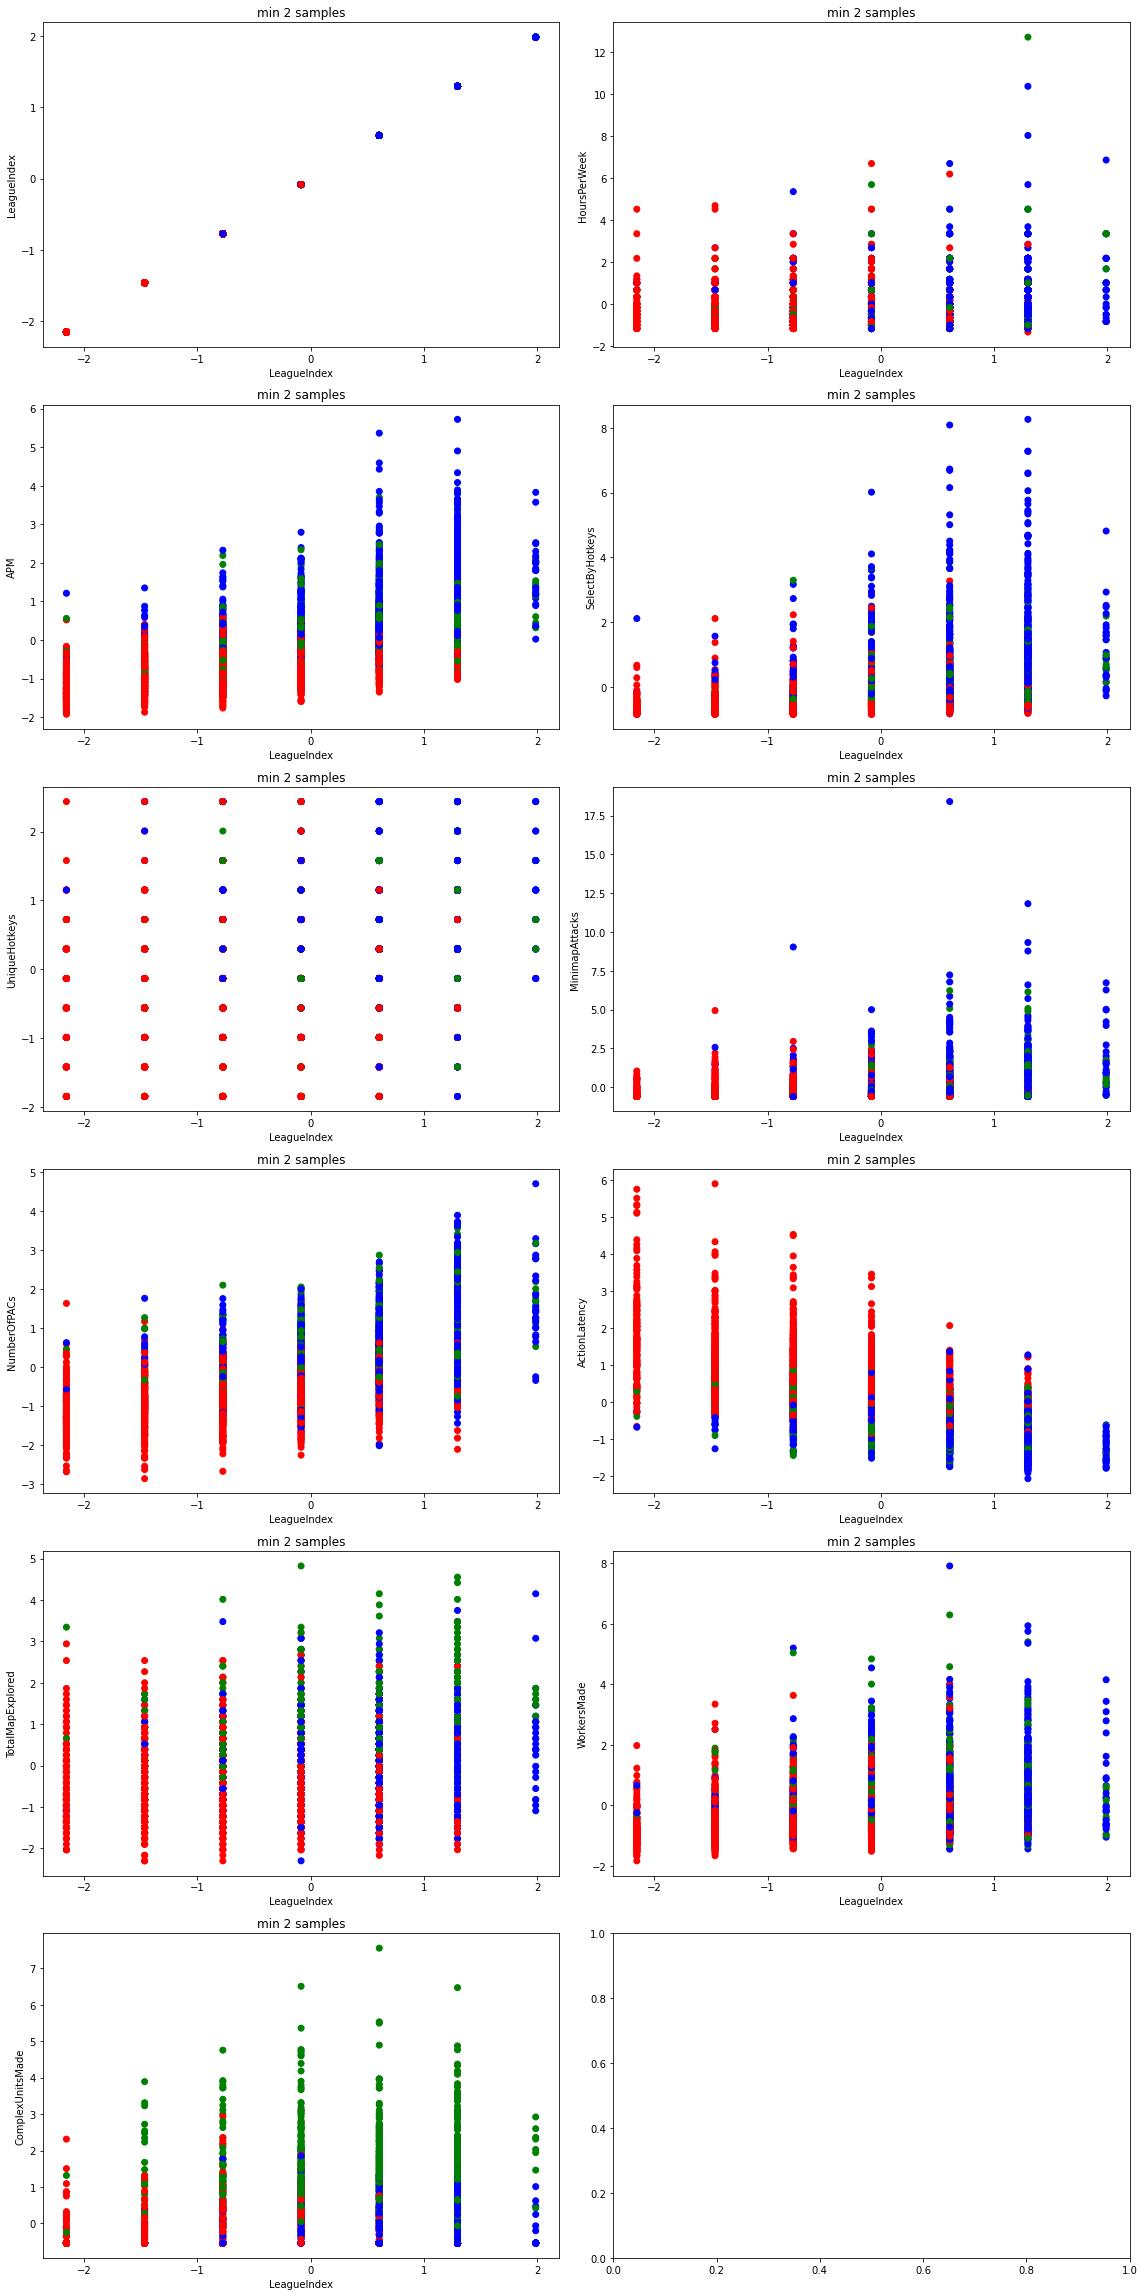

In [28]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=7

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = KM(init='k-means++', n_clusters=3, n_init=10)
dataX = data.iloc[:,8:]
dbs.fit(dataX)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(2)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

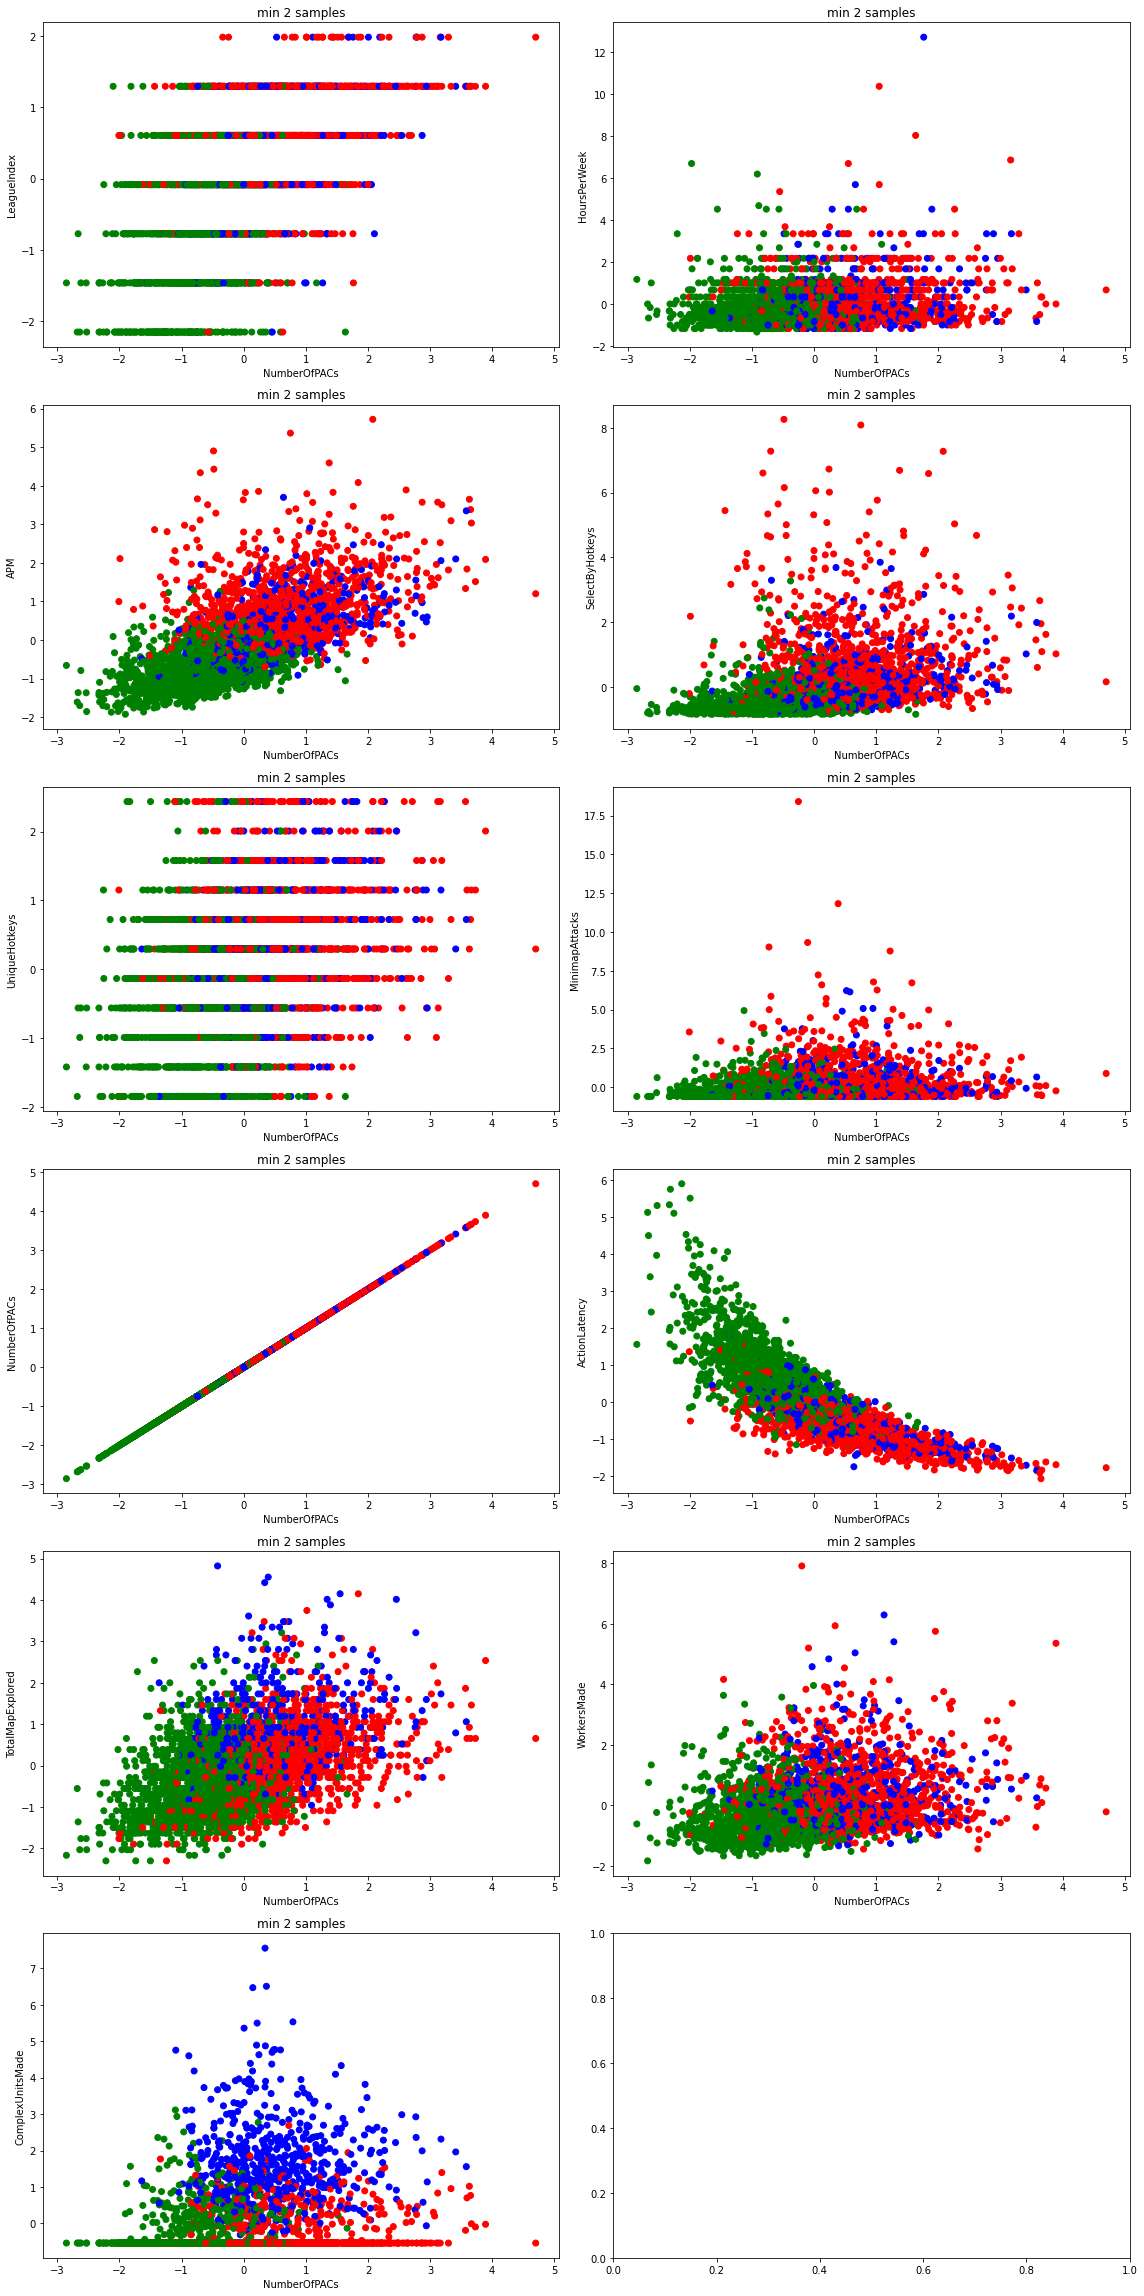

In [30]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

plot_against=17

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12]] = plt.subplots(6,2,figsize=(16,32))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
 
dbs = KM(init='k-means++', n_clusters=3, n_init=10)
dataX = data.iloc[:,8:]
dbs.fit(dataX)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(2)) 

    axes[subplt_n].scatter(data.iloc[:,plot_against], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(1,12):
    addSubPlot(i-1, reduced_data, i+2)
idx = 0
for ax in axes:
    ax.set(xlabel=var[plot_against], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()


##### Without the information on which league the player is in, it seems to be focusing on how quickly a player is acting in the game, which makes sense since there are many variables related to that in this dataset.